In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [63]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [64]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Defining RELU for Activation Layer 1
def ReLU(Z):
    return np.maximum(Z, 0)

# Defining Softmax for Activation Layer 2
# Softmax converts outputs into probabilities of liklihood
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward Propogation
def forward_prop(W1, b1, W2, b2, X):
    # Unactivated first layer(weight and bias)
    Z1 = W1.dot(X) + b1
    
    # Activation Layer 1 - Making it a hidden layer using RELU function
    A1 = ReLU(Z1)

    # Unactivated second layer
    Z2 = W2.dot(A1) + b2

    # Acivation Layer 2 - Using softmax for output
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2
# One Hot encoding function
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0


# Backward Propogation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    
    # One Hot encoding Y
    one_hot_Y = one_hot(Y)

    # Error of output: how much is output off by
    dZ2 = A2 - one_hot_Y
    # How much weight/bias contributed to error in 2nd(output) layer
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # Error of hidden layer 1
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    # How much weight/bias contributed to error in 1st hidden layer
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)


    return dW1, db1, dW2, db2

# Updating Parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2
    

In [65]:
# Gradient Descent - the main cycle that loops through the 3 main stages
# 1. Forward Propogation -> 2. Backward Propogation -> 3. Updating Paramaters for Forward Prop -> Forward Propogation...

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        # Forward Propogation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        # Backward Propogation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        # Updating Parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            print("Iteration:", i)
            print("Accuracy", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [66]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration: 0
[6 2 6 ... 4 2 9] [4 6 7 ... 7 3 5]
Accuracy 0.09551219512195122
Iteration: 50
[6 1 4 ... 6 3 0] [4 6 7 ... 7 3 5]
Accuracy 0.35297560975609754
Iteration: 100
[4 6 7 ... 6 4 9] [4 6 7 ... 7 3 5]
Accuracy 0.4830243902439024
Iteration: 150
[4 6 7 ... 7 3 0] [4 6 7 ... 7 3 5]
Accuracy 0.5814634146341463
Iteration: 200
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.6624878048780488
Iteration: 250
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.7228536585365853
Iteration: 300
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.764390243902439
Iteration: 350
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.7926829268292683
Iteration: 400
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.8109756097560976
Iteration: 450
[4 6 7 ... 7 3 3] [4 6 7 ... 7 3 5]
Accuracy 0.8239268292682926


~ 80% Accuracy on training set

In [68]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Let's See A Few Examples

Prediction:  [1]
Label:  1


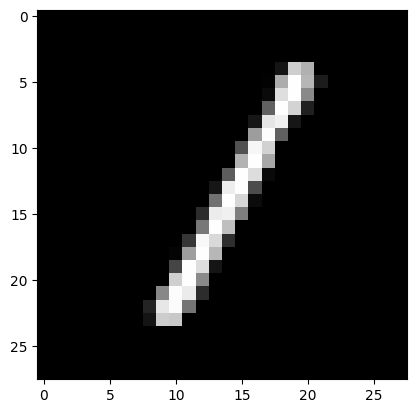

Prediction:  [8]
Label:  3


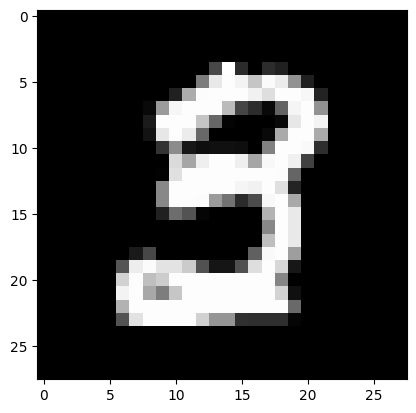

Prediction:  [0]
Label:  0


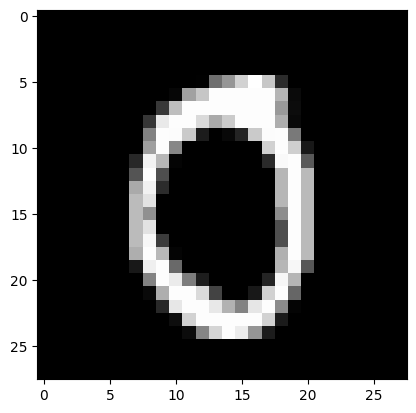

Prediction:  [6]
Label:  6


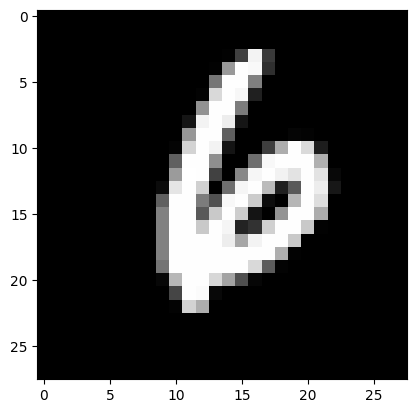

Prediction:  [4]
Label:  4


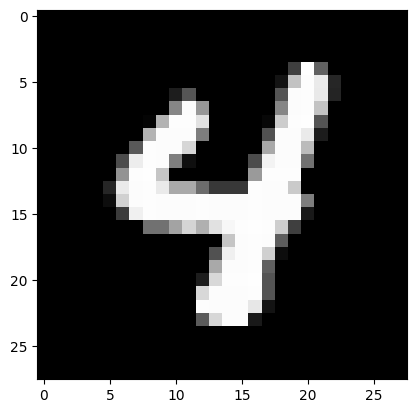

Prediction:  [6]
Label:  6


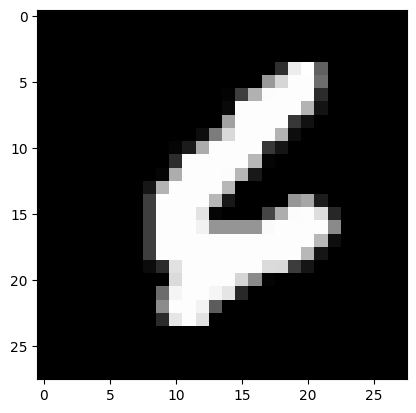

In [71]:
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)

## Testing on Dev Set

In [72]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 9 9 5 9 0 9 3 8 5 4 9 3 4 5 1 2 5 0 3 3 9 7 1 6 4 5 5 1 7 8 6 5 6 3 5 1
 5 5 6 7 5 5 8 0 2 3 8 3 7 7 2 9 4 8 6 1 8 2 7 2 2 4 9 6 1 0 8 0 7 1 4 4 7
 4 7 5 5 3 6 7 4 9 8 3 3 3 0 7 2 0 3 6 1 7 3 7 9 8 1 9 9 5 8 6 2 7 9 4 7 5
 2 7 5 1 9 7 2 1 8 7 5 2 5 2 8 7 0 7 6 8 9 5 8 6 3 0 7 4 1 2 4 2 6 3 9 2 7
 0 6 1 5 0 3 3 8 8 3 1 0 9 0 8 2 1 6 6 5 2 6 0 2 6 7 0 2 1 8 1 1 2 2 3 0 3
 8 0 0 5 5 6 2 1 1 0 1 0 2 2 8 7 3 0 6 8 3 1 6 9 9 6 4 8 9 6 3 1 5 0 3 6 2
 3 6 2 4 4 4 9 4 7 2 0 2 9 3 3 0 6 7 2 3 8 5 3 5 6 2 8 3 4 8 8 4 3 3 2 2 9
 0 3 3 2 3 8 1 3 7 4 4 9 4 9 0 5 1 5 2 2 7 1 6 1 3 0 5 5 2 9 0 4 9 2 4 4 5
 4 7 1 8 3 2 1 3 1 3 2 7 5 8 9 3 3 3 9 3 6 5 5 0 5 9 4 4 5 4 8 2 6 3 1 0 4
 4 4 7 1 7 0 0 1 4 7 2 5 3 2 3 9 6 1 5 4 5 4 9 0 2 1 9 5 8 2 2 8 6 3 8 5 2
 0 2 8 4 1 1 6 4 9 8 6 0 1 4 6 2 1 0 9 8 7 4 4 4 1 9 4 0 0 5 0 3 5 8 5 7 2
 9 7 8 1 7 8 7 6 9 7 2 1 5 5 6 5 1 3 6 8 0 1 1 6 3 5 1 3 3 1 9 7 1 2 6 2 3
 7 2 3 5 9 7 1 6 7 1 6 8 1 0 9 2 2 4 2 0 4 5 3 9 0 8 0 8 5 8 4 9 1 0 2 6 0
 9 8 3 4 1 8 4 0 4 0 7 1 

0.826

So, 82.6% accuracy on Dev Set!